**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [107]:
# write your code here
import numpy as np
import pandas as pd
from copy import copy
from types import SimpleNamespace
import sympy as sm
from scipy import optimize
import matplotlib.pyplot as plt


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor



The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [108]:
bl = SimpleNamespace()

bl.alpha = 0.5
bl.kappa = 1.0
bl.nu = 1/(2*16**2)
bl.w = 1
bl.tau = 0.3
bl.w_tilde = (1-bl.tau)*bl.w

In [109]:
import numpy as np
import scipy.optimize as optimize

# Given list of G values
G_list = [1.0, 2.0]

# Calculate bl.w_tilde
bl.w_tilde = (1 - bl.tau) * bl.w

# Define value function
def V(L, G, bl):
    """
    Calculates the value function.

    Args:
        L (float): Labor input.
        G (float): G value.
        bl: An object with parameters.

    Returns:
        float: Value function output.
    """
    return np.log(((bl.kappa + (1 - bl.tau) * bl.w * L) ** bl.alpha)
                   * G ** (1 - bl.alpha)) - bl.nu * ((L * L) / 2)

def L_opt_analytical(bl, G):
    """
    Calculates the analytical solution for optimal labor input.

    Args:
        bl: An object with parameters.
        G (list): List of G values.

    Returns:
        list: List of optimal labor inputs.
    """
    L_opt = []
    for k in G:
        L_opt.append((-bl.kappa + np.sqrt(bl.kappa * bl.kappa +
                            4 * (bl.alpha / bl.nu)
                             * bl.w_tilde * bl.w_tilde)) 
                     / (2 * bl.w_tilde))
    return L_opt

def L_opt(G, bl):
    """
    Calculates the numerical solution for optimal labor input.

    Args:
        G (list): List of G values.
        bl: An object with parameters.

    Returns:
        list: List of optimal labor inputs.
    """
    sol = []
    for k in G:
        obj = lambda L: -V(L, k, bl)
        x0 = 12
        sol.append(optimize.minimize(obj, x0, method='Nelder-Mead', bounds=((0, 24),)).x[0])
    return sol

# Calculate numerical solutions for optimal labor input
solutions = L_opt(G_list, bl)
solution = list(solutions)

# Calculate analytical solutions for optimal labor input
solution_analytical = L_opt_analytical(bl, G_list)

# Print the results
print(f"The estimated solutions for G=1 and G=2, respectively, are {solution}")
print(f"The analytical solutions for G=1 and G=2, respectively, are {solution_analytical}")


The estimated solutions for G=1 and G=2, respectively, are [15.301684570312506, 15.301684570312506]
The analytical solutions for G=1 and G=2, respectively, are [15.30165022719559, 15.30165022719559]


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

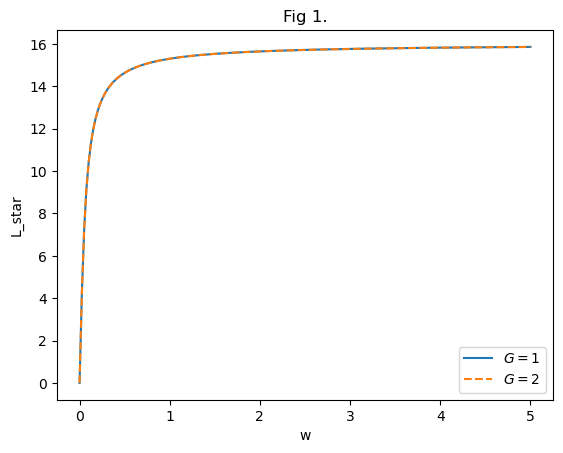

In [110]:
# write your code here

ws = np.linspace(0,5,200)
sols = np.empty((2,200))
sol_1 = np.empty(200)
sol_2 = np.empty(200)

for i,w in enumerate(ws):
    bl.w = w
    sols = L_opt(G_list, bl)
    sols_list = list(sols)
    sol_1[i] = sols_list[0]
    sol_2[i] = sols_list[1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ws,sol_1, label = '$G=1$')
ax.plot(ws,sol_2,'--', label = '$G=2$')

ax.set_title("Fig 1.")
ax.set_ylabel('L_star')
ax.set_xlabel('w')
ax.legend()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/vd/dwydg2bx2gz3j9x78jm_tx400000gn/T/ipykernel_5015/394242683.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa +


(0.0, 4.0)

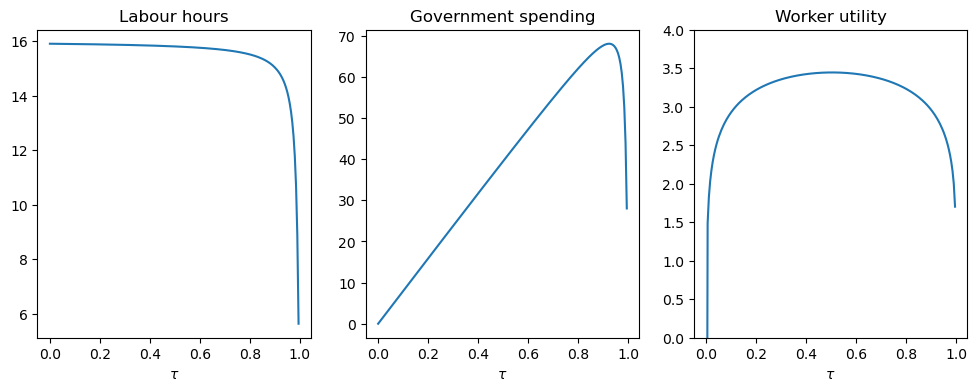

In [111]:
# write your code here

# Define G
def G_func(L, bl): return bl.tau*bl.w*L
def L_analytical_func(bl): 
    return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 
                                4 * (bl.alpha / bl.nu) 
                                * bl.w_tilde * bl.w_tilde))/ (2 * bl.w_tilde)


def V_new(L,bl):
    return np.log(((bl.kappa 
                    + (1 - bl.tau) * bl.w * L) ** bl.alpha)
                   * (bl.tau*bl.w*L) ** (1 - bl.alpha)) - bl.nu * ((L * L) / 2)


def iterate_over_tau(bl, do_print = False):

    tau_grid = np.linspace(1e-8,1,200)
    L_vec = np.empty(200)
    G_vec = np.empty(200)
    V_vec = np.empty(200)

    for i, tau in enumerate(tau_grid):
        bl.tau = tau 
        bl.w_tilde = (1-bl.tau)*bl.w

        L_vec[i] = L_analytical_func(bl)
        G_vec[i] = G_func(L_vec[i], bl)
        V_vec[i] = V(L_vec[i], G_vec[i], bl) 

        if do_print == True: 
            print(f'for tau = {tau}, L = {L_vec[i]}, G = {G_vec[i]} and V = {V_vec[i]}')

    return tau_grid, L_vec, G_vec, V_vec 

tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)    

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,3,1)
ax.plot(tau_grid, L_vec)
ax.set_title('Labour hours')
ax.set_xlabel(r'$\tau$')

ax = fig.add_subplot(1,3,2)
ax.plot(tau_grid, G_vec)
ax.set_title('Government spending')
ax.set_xlabel(r'$\tau$')

ax = fig.add_subplot(1,3,3)
ax.plot(tau_grid, V_vec)
ax.set_title('Worker utility')
ax.set_xlabel(r'$\tau$')
ax.set_ylim(0,4)


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

/var/folders/vd/dwydg2bx2gz3j9x78jm_tx400000gn/T/ipykernel_5015/394242683.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa +


Text(0.5, 1.0, 'Fig 3. Socially optimal tax')

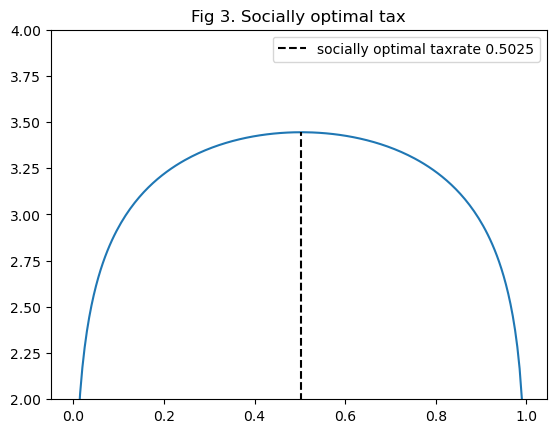

In [112]:
# Identify the maximum V and find the corresponding tau
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]

# Illustrate in figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tau_grid, V_vec)
ax.vlines(tau_opt,0,np.max(np.nan_to_num(V_vec)), linestyles='--', colors='black', label=f'socially optimal taxrate {tau_opt:.4f}')
ax.legend()
ax.set_ylim(2,4)
ax.set_title('Fig 3. Socially optimal tax')

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [269]:
bl.sigma = 1.001
bl.rho = 1.001
bl.eps = 1
bl.w =  1
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]
G_list = np.linspace(1e-8, 15, 200)

def Nu_given_G_and_tau(bl, L, tau_opt, G):
    bl.tau = tau_opt
    C = bl.kappa + (1-bl.tau)*bl.w*L
    elast1 = (bl.sigma-1)/bl.sigma
    elast2 = bl.sigma/(1-bl.sigma)
    disutility = -bl.nu*(L**(1+bl.eps)/(1+bl.eps))
    return (((((bl.alpha*C**elast1+(1-bl.alpha)*G**elast1)**elast2)**(1-bl.rho))-1)/(1-bl.rho)) - disutility

def sol_L_given_G(bl, tau_opt, G_list):
    Ls = [None]*len(G_list)
    Vs = [None]*len(G_list)

    for i, G in enumerate(G_list):
        obj = lambda L: Nu_given_G_and_tau(bl, L, tau_opt, G)
        bnds = ((1e-2, 24),)
        if i > 0:
            x0 = Ls[i-1]
        else:
            x0 = 0.1
        
        res = optimize.minimize(obj, x0=x0, method='L-BFGS-B', bounds=bnds)
        Ls[i] = res.x
        Vs[i] = -res.fun
    return Ls, Vs

# run solver
Ls = sol_L_given_G(bl, tau_opt, G_list) 

/var/folders/vd/dwydg2bx2gz3j9x78jm_tx400000gn/T/ipykernel_5015/394242683.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa +


In [270]:
# calculate dif
Vslist = list()
for tau_opt in np.linspace(0.4, 0.6,50):
    Ls, Vs = sol_L_given_G(bl, tau_opt, G_list) 
    dif = []
    for i,x in zip(Ls, G_list):
        dif.append(x-tau_opt*bl.w*i)
    dif_grid = interpolate.RegularGridInterpolator([G_list],dif, bounds_error=False, fill_value=None)
    Vs_grid = interpolate.RegularGridInterpolator([G_list],Vs, bounds_error=False, fill_value=None)
    def root_grid(x):
        return dif_grid([x])[0][0]

    initial_guess = 1
    solution = optimize.root(root_grid, x0= initial_guess)
    Vslist.append(Vs_grid([solution.x]))

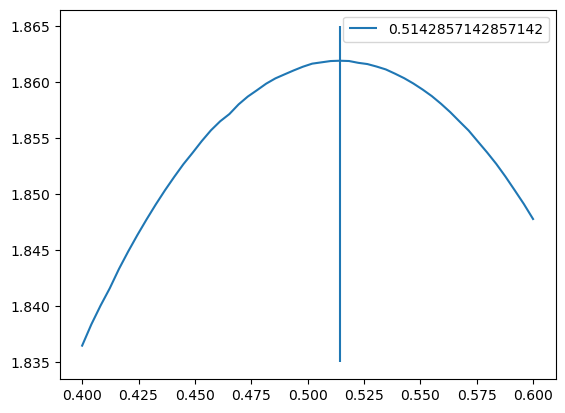

In [271]:
fig, ax = plt.subplots(1,1)
taus = np.linspace(0.4, 0.6,50)
ax.plot(taus, Vslist)
ax.vlines(taus[np.argmax(Vslist)], ymin=1.835,ymax=1.865, label=f"{taus[np.argmax(Vslist)]}" )
ax.legend()

In [ ]:
G_list[np.argmin(np.abs(dif))]
fig, ax = plt.subplots(1,1)
ax.plot(G_list, dif)
ax.hlines(0, xmin=0, xmax=24)
ax.vlines(G_list[np.argmin(np.abs(dif))], ymin=-8, ymax=16, linestyles="--")

In [221]:
dif_grid([7])[0][0]

-0.6995960597199931

[7.70061878]


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
bl.sigma = 1.001
bl.rho = 1.001
bl.eps = 1
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]

print(tau_opt)

def calculate_C(bl, L):
    return bl.kappa + (1 - bl.tau) * bl.w * L

def calculate_G(bl, L):
    return bl.tau*bl.w*L

def objective_function(L, bl):
    C = calculate_C(bl, L)
    G = calculate_G(bl,L)
    term1 = ((bl.alpha * C**((bl.sigma - 1) / bl.sigma) 
              + (1 - bl.alpha) * G**((bl.sigma -1) 
                                     / bl.sigma))**(bl.sigma / 
                                    (bl.sigma-1)))**(1 - bl.rho) - 1
    term2 = bl.nu * L**(1 + bl.eps) / (1 + bl.eps)
    return -(term1 / (1 - bl.rho) - term2)

objective_function(bl)

def solve_worker_problem(bl):
    # Define the bounds for L
    L_bounds = (1e-8, 24.0)

    # Set the initial guess for L
    x0 = 1.0
    constraints = {fi}

    # Define the optimization problem
    result = optimize.minimize(objective_function, x0, method = 'Nelder-Mead', args=(bl), bounds=([L_bounds]))

    # Return the optimal value of L
    return result


print(solve_worker_problem(bl))

Gs = np.linspace(0e-16,100,2000)
Ls = np.empty(2000)
diffs = np.empty(2000)


0.5025125677889448


/var/folders/f8/rfv2dg5j1jl2h__f_28lykhm0000gn/T/ipykernel_94871/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


TypeError: objective_function() missing 1 required positional argument: 'bl'

In [ ]:
# tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
# argmax_index = np.argmax((np.nan_to_num(V_vec)))
# tau_opt  = tau_grid[argmax_index]

# def find_opt_G(bl, tau=tau_opt):
#     tol = 0
#     bl.tau = tau
#     bl.w_tilde = (1 - bl.tau) * bl.w

#     Gs = np.linspace(0e-16, 100, 2000)
#     Ls = np.empty(2000)
#     diffs = np.empty(2000)

#     min_diff_index = 0  # Index of the minimum absolute difference
#     min_diff = float('inf')  # Initialize the minimum difference with infinity

#     for i, g in enumerate(Gs):
#         L_res = solve_worker_problem(bl, G=g)
#         Ls[i] = L_res
#         diff = g - bl.tau * bl.w * L_res
#         diffs[i] = diff

#         # Check if the current difference is smaller than the minimum difference
#         if abs(diff) < abs(min_diff):
#             min_diff = diff
#             min_diff_index = i

#     opt_G = Gs[min_diff_index]
#     opt_L = Ls[min_diff_index]

#     return opt_G, opt_L, min_diff

# def find_opt_G(bl, tau=tau_opt):
#     tol = 1e-8
#     bl.tau = tau
#     bl.w_tilde = (1-bl.tau)*bl.w

#     Gs = np.linspace(0e-16,100,2000)
#     Ls = np.empty(2000)
#     diffs = np.empty(2000)

#     min_diff_index = 0  # Index of the minimum absolute difference
#     min_diff = float('inf')  # Initialize the minimum difference with infinity
        
#     for i,g in enumerate(Gs):
#             L_res = solve_worker_problem(bl, G=g)
#             Ls[i] = L_res
#             diff = g - bl.tau * bl.w * L_res
#             print(diff)
#             diffs[i] = diff

#         # Check if the current difference is smaller than the minimum difference
#             if abs(diff) < abs(min_diff):
#                 min_diff = diff
#                 min_diff_index = i

#     opt_G = Gs[min_diff_index]
#     opt_L = Ls[min_diff_index]

#     return opt_G, opt_L, min_diff

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  